Author: David Noorcahya

#Import Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


#Import Packages and Dataset

In [36]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
df = pd.read_csv('2021population.csv')

#Initial EDA

In [38]:
df.head(5)

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,444,751,667","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,394,894,266","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"333,129,986","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"276,676,718","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"225,674,528","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


In [39]:
df.tail(5)

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
223,MSR,Montserrat,"4,977","4,992",102 sq_km,49/sq_km,-0.30%,0.00%,228
224,FLK,Falkland Islands,"3,533","3,480","12,173 sq_km",0/sq_km,1.52%,0.00%,229
225,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230
226,TKL,Tokelau,"1,373","1,357",12 sq_km,114/sq_km,1.18%,0.00%,231
227,VAT,Vatican City,800,801,1 sq_km,800/sq_km,-0.12%,0.00%,232


In [40]:
df.sample(5)

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
208,MAF,Sint Maarten,"43,412","42,876",34 sq_km,"1,277/sq_km",1.25%,0.00%,212
63,KAZ,Kazakhstan,"19,019,066","18,776,707","2,724,900 sq_km",7/sq_km,1.16%,0.24%,64
31,ARG,Argentina,"45,651,239","45,195,774","2,780,400 sq_km",16/sq_km,0.91%,0.58%,32
15,COD,Dr Congo,"92,690,133","89,561,403","2,344,858 sq_km",39/sq_km,3.14%,1.17%,16
17,IRN,Iran,"85,141,219","83,992,949","1,648,195 sq_km",52/sq_km,1.23%,1.08%,18


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   iso_code           228 non-null    object
 1   country            228 non-null    object
 2   2021_last_updated  228 non-null    object
 3   2020_population    228 non-null    object
 4   area               228 non-null    object
 5   density_sq_km      228 non-null    object
 6   growth_rate        228 non-null    object
 7   world_%            228 non-null    object
 8   rank               228 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 16.2+ KB


Terdapat 228 baris dan 9 kolom pada dataset, dan tidak terdapat missing value pada dataset yang digunakan.

Data pada dataset yang digunakan seperti populasi 2021, populasi 2020, area, density, growth rate dan %world masih berupa object, sehingga perlu diubah menjadi numeric terlebih dahulu agar dapat dilanjutkan ke proses-proses berikutnya.

#Data Cleaning

In [42]:
df['2021_last_updated'] = df['2021_last_updated'].str.replace(',','')
df['2020_population'] = df['2020_population'].str.replace(',','')
df['area'] = df['area'].str.replace(',','')
df['area'] = df['area'].str.replace(' ','')
df['area'] = df['area'].str.replace('sq_km','')
df['density_sq_km'] = df['density_sq_km'].str.replace('/sq_km','')
df['growth_rate'] = df['growth_rate'].str.replace('%','')
df['world_%'] = df['world_%'].str.replace('%','')

Convert object to numeric

In [43]:
df['2021_last_updated'] = pd.to_numeric(df['2021_last_updated'],errors = 'coerce')
df['2020_population'] = pd.to_numeric(df['2020_population'],errors = 'coerce')
df['area'] = pd.to_numeric(df['area'],errors = 'coerce')
df['density_sq_km'] = pd.to_numeric(df['density_sq_km'],errors = 'coerce')
df['growth_rate'] = pd.to_numeric(df['growth_rate'],errors = 'coerce')
df['world_%'] = pd.to_numeric(df['world_%'],errors = 'coerce')

In [44]:
df.describe()

,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
count,2.280000e+02,2.280000e+02,2.280000e+02,217.000000,228.000000,228.000000,228.000000
mean,3.456893e+07,3.417852e+07,5.962995e+05,149.778802,1.067412,0.438377,115.311404
std,1.381198e+08,1.370800e+08,1.782545e+06,169.860610,1.059857,1.752463,67.032535
min,8.000000e+02,8.010000e+02,1.000000e+00,0.000000,-1.290000,0.000000,1.000000
25%,5.579352e+05,5.521262e+05,4.133500e+03,31.000000,0.297500,0.010000,57.750000
50%,5.858841e+06,5.821272e+06,8.523550e+04,89.000000,0.920000,0.070000,114.500000
75%,2.213711e+07,2.201413e+07,4.467625e+05,215.000000,1.830000,0.277500,172.250000
max,1.444752e+09,1.439324e+09,1.709824e+07,840.000000,4.430000,18.340000,232.000000


Semua kolom memiliki unique value.

Namun, terdapat baris yang memiliki density_sq_km dan world_% bernilai 0 dan dianggap sebagai missing values, maka kolom akan dihilangkan untuk menjaga data negara tetap lengkap.

In [45]:
df1 = df.drop(['density_sq_km','world_%'], axis = 1)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           228 non-null    object 
 1   country            228 non-null    object 
 2   2021_last_updated  228 non-null    int64  
 3   2020_population    228 non-null    int64  
 4   area               228 non-null    int64  
 5   growth_rate        228 non-null    float64
 6   rank               228 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 12.6+ KB


In [47]:
len(df1.drop_duplicates()) / len(df1) #duplicate row handling

1.0

Dataset dengan 228 baris dan 7 kolom sudah bersih dan tidak terdapat duplicate row, kini data siap untuk digunakan pada tahap selanjutnya.

#Getting unique values for each of the column

In [48]:
for col in df1.columns:
    print(f"Column: {col}")
    print(df1[col].unique())
    print("="*10)

Column: iso_code
['CHN' 'IND' 'USA' 'IDN' 'PAK' 'BRA' 'NGA' 'BGD' 'RUS' 'MEX' 'JPN' 'ETH'
 'PHL' 'EGY' 'VNM' 'COD' 'TUR' 'IRN' 'DEU' 'THA' 'GBR' 'FRA' 'TZA' 'ITA'
 'ZAF' 'KEN' 'MMR' 'KOR' 'COL' 'UGA' 'ESP' 'ARG' 'SDN' 'DZA' 'UKR' 'IRQ'
 'AFG' 'CAN' 'POL' 'MAR' 'SAU' 'UZB' 'AGO' 'PER' 'MYS' 'MOZ' 'GHA' 'YEM'
 'NPL' 'VEN' 'MDG' 'CMR' 'CIV' 'PRK' 'AUS' 'NER' 'TWN' 'LKA' 'BFA' 'MLI'
 'MWI' 'CHL' 'ROU' 'KAZ' 'ZMB' 'SYR' 'GTM' 'ECU' 'SEN' 'NLD' 'KHM' 'TCD'
 'SOM' 'ZWE' 'GIN' 'RWA' 'BEN' 'BDI' 'TUN' 'BOL' 'BEL' 'HTI' 'SSD' 'CUB'
 'DOM' 'CZE' 'GRC' 'JOR' 'AZE' 'PRT' 'SWE' 'HND' 'ARE' 'TJK' 'HUN' 'BLR'
 'PNG' 'AUT' 'ISR' 'CHE' 'SRB' 'TGO' 'SLE' 'HKG' 'LAO' 'PRY' 'LBY' 'BGR'
 'LBN' 'NIC' 'KGZ' 'SLV' 'TKM' 'SGP' 'DNK' 'COG' 'FIN' 'NOR' 'SVK' 'OMN'
 'PSE' 'LBR' 'CRI' 'IRL' 'CAF' 'NZL' 'MRT' 'PAN' 'KWT' 'HRV' 'MDA' 'GEO'
 'ERI' 'URY' 'MNG' 'BIH' 'JAM' 'ARM' 'QAT' 'ALB' 'PRI' 'LTU' 'NAM' 'GMB'
 'BWA' 'GAB' 'LSO' 'MKD' 'SVN' 'GNB' 'LVA' 'BHR' 'GNQ' 'TTO' 'TLS' 'EST'
 'MUS' 'CYP' 'DJI' 'FJI' 'RU' 'COM

#Ranking by area

In [49]:
display(df1.sort_values(by=['area'],ascending=False)) #Negara terluas

,iso_code,country,2021_last_updated,2020_population,area,growth_rate,rank
8,RUS,Russia,145909756,145934462,17098242,-0.02,9
37,CAN,Canada,38104242,37742154,9984670,0.86,38
0,CHN,China,1444751667,1439323776,9706961,0.34,1
2,USA,United States,333129986,331002651,9372610,0.58,3
5,BRA,Brazil,214151229,212559417,8515767,0.67,6
...,...,...,...,...,...,...,...
221,BL,Saint Barthelemy,9907,9877,21,0.30,226
226,TKL,Tokelau,1373,1357,12,1.18,231
214,GIB,Gibraltar,33698,33691,6,0.02,218
209,MCO,Monaco,39511,39242,2,0.69,213


Dari hasil diatas negara dengan luas area terbesar adalah Russia yang jumlah populasinya menempati posisi 9 dari seluruh negara, sedangkan negara dengan luas area terkecil adalah Vatican City yang jumlah populasinya menempati posisi 232 dari seluruh negara.

#Group by area

Kelompokkan kategori negara berdasarkan luas area menjadi "Negara Besar", "Negara Sedang", "Negara Kecil". 

In [50]:
df1['area'].describe()

count    2.280000e+02
mean     5.962995e+05
std      1.782545e+06
min      1.000000e+00
25%      4.133500e+03
50%      8.523550e+04
75%      4.467625e+05
max      1.709824e+07
Name: area, dtype: float64

Dari data negara-negara yang tersedia, akan dikelompokkan berdasarkan luas areanya, menjadi:

a) Negara Besar (3) dengan luas wilayah lebih dari 446762.5

b) Negara Sedang (2) dengan luas wilayah 85235.50 sampai dengan 446762.5

c) Negara Kecil (1) dengan luas wilayah kurang dari 85235.50 

In [51]:
def label_encoding_size_country(x):
    if x >= 446762.5 :
        return 3
    elif x >= 85235.50:
        return 2
    else: 
        return 1

In [52]:
df1['country_size'] = df1['area'].apply(label_encoding_size_country)

In [53]:
df1.sample(5)

,iso_code,country,2021_last_updated,2020_population,area,growth_rate,rank,country_size
205,ASM,American Samoa,55100,55191,199,-0.16,209,1
15,COD,Dr Congo,92690133,89561403,2344858,3.14,16,3
148,SVN,Slovenia,2078724,2078938,20273,-0.01,149,1
159,FJI,Fiji,903595,896445,18272,0.72,161,1
101,TGO,Togo,8500450,8278724,56785,2.41,102,1


Sekarang negara-negara telah dikelompokkan sesuai dengan luas wilayah atau areanya. 

Lalu berapa banyak negara yang tergolong menjadi Negara Besar, Negara Sedang dan Negara Kecil?

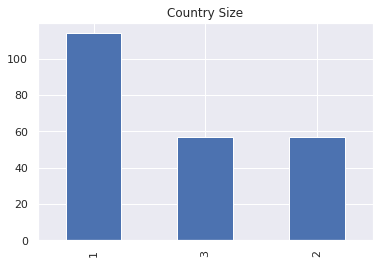

In [54]:
df1['country_size'].value_counts().plot(kind='bar')
plt.title("Country Size")
plt.show()

#Population Density

In [55]:
df1['population_density'] = df1['2021_last_updated']/df1['area']

In [56]:
df1.describe() #Sudah tidak terdapat missing value pada density

,2021_last_updated,2020_population,area,growth_rate,rank,country_size,population_density
count,2.280000e+02,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000
mean,3.456893e+07,3.417852e+07,5.962995e+05,1.067412,115.311404,1.750000,456.595213
std,1.381198e+08,1.370800e+08,1.782545e+06,1.059857,67.032535,0.830981,2098.153944
min,8.000000e+02,8.010000e+02,1.000000e+00,-1.290000,1.000000,1.000000,0.026258
25%,5.579352e+05,5.521262e+05,4.133500e+03,0.297500,57.750000,1.000000,35.459959
50%,5.858841e+06,5.821272e+06,8.523550e+04,0.920000,114.500000,1.500000,95.535016
75%,2.213711e+07,2.201413e+07,4.467625e+05,1.830000,172.250000,2.250000,240.130316
max,1.444752e+09,1.439324e+09,1.709824e+07,4.430000,232.000000,3.000000,21981.566667


Kemudian akan dikelompokkan berdasarkan kepadatan penduduknya, menjadi:

a) Kepadatan Penduduk Tinggi (3) dengan luas wilayah lebih dari 240.130316

b) Kepadatan Penduduk Sedang (2) dengan luas wilayah 95.535016 sampai dengan 240.130316

c) Kepadatan Penduduk Rendah (1) dengan luas wilayah kurang dari 95.535016 


In [57]:
def label_encoding_population_status(x):
    if x >= 240.130316 :
        return 3
    elif x >= 95.535016:
        return 2
    else: 
        return 1

In [58]:
df1['population_status'] = df1['population_density'].apply(label_encoding_population_status)

In [59]:
df1.head(5)

,iso_code,country,2021_last_updated,2020_population,area,growth_rate,rank,country_size,population_density,population_status
0,CHN,China,1444751667,1439323776,9706961,0.34,1,3,148.836661,2
1,IND,India,1394894266,1380004385,3287590,0.97,2,3,424.290823,3
2,USA,United States,333129986,331002651,9372610,0.58,3,3,35.542926,1
3,IDN,Indonesia,276676718,273523615,1904569,1.04,4,3,145.269989,2
4,PAK,Pakistan,225674528,220892340,881912,1.95,5,3,255.892343,3


Berapa banyak negara yang tergolong memiliki kepadatan penduduk yang tinggi, sedang dan rendah?

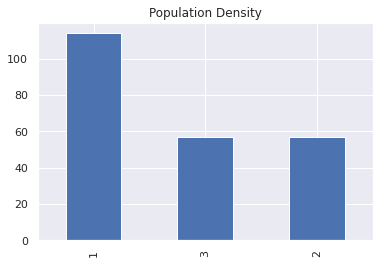

In [60]:
df1['population_status'].value_counts().plot(kind='bar')
plt.title("Population Density")
plt.show()

In [61]:
display(df1.sort_values(by=['population_density'],ascending=False)) #Negara terpadat

,iso_code,country,2021_last_updated,2020_population,area,growth_rate,rank,country_size,population_density,population_status
165,MAC,Macau,659447,649335,30,1.40,167,1,21981.566667,3
209,MCO,Monaco,39511,39242,2,0.69,213,1,19755.500000,3
113,SGP,Singapore,5902034,5850342,710,0.79,114,1,8312.723944,3
103,HKG,Hong Kong,7559008,7496981,1104,0.74,104,1,6846.927536,3
214,GIB,Gibraltar,33698,33691,6,0.02,218,1,5616.333333,3
...,...,...,...,...,...,...,...,...,...,...
142,NAM,Namibia,2592448,2540905,825615,1.83,143,3,3.140020,1
168,ESH,Western Sahara,613455,597339,266000,2.43,170,2,2.306222,1
134,MNG,Mongolia,3334920,3278290,1564110,1.56,135,3,2.132152,1
224,FLK,Falkland Islands,3533,3480,12173,1.52,229,1,0.290232,1


Dari hasil diatas dapat diketahui bahwa Macau merupakan negara terpadat dibandingkan negara-negara lain, sedangkan greenland merupakan negara dengan kepadatan paling rendah dibandingkan negara-negara lainnya.

#Correlation Analysis

In [62]:
df1_corr = df1.corr()
df1_corr

,2021_last_updated,2020_population,area,growth_rate,rank,country_size,population_density,population_status
2021_last_updated,1.000000,0.999987,0.454305,-0.007362,-0.355933,0.297773,-0.028218,0.072170
2020_population,0.999987,1.000000,0.455089,-0.009325,-0.354802,0.296570,-0.028088,0.072250
area,0.454305,0.455089,1.000000,0.004447,-0.382576,0.456286,-0.063835,-0.206378
growth_rate,-0.007362,-0.009325,0.004447,1.000000,-0.272069,0.332890,-0.030913,-0.203415
rank,-0.355933,-0.354802,-0.382576,-0.272069,1.000000,-0.732036,0.134843,0.189153
country_size,0.297773,0.296570,0.456286,0.332890,-0.732036,1.000000,-0.163167,-0.473684
population_density,-0.028218,-0.028088,-0.063835,-0.030913,0.134843,-0.163167,1.000000,0.284274
population_status,0.072170,0.072250,-0.206378,-0.203415,0.189153,-0.473684,0.284274,1.000000


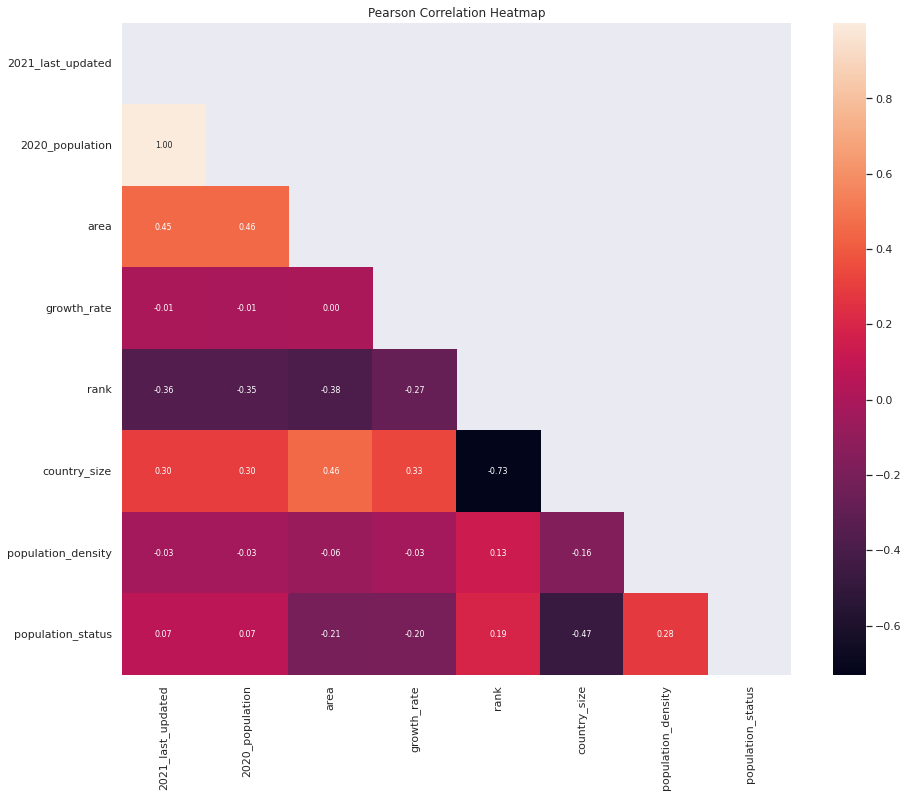

In [63]:
df1_corr = df1.corr()
mask = np.zeros_like(df1_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df1_corr,mask=mask, 
                 annot=True, annot_kws={'size':8}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

Dari hasil korelasi diatas dapat diketahui bahwa:

- Jumlah populasi 2020 berkorelasi sangat kuat dengan jumlah populasi 2021, yaitu 1.00

- area memiliki korelasi yang cukup kuat dengan jumlah populasi yakni 0.45 dengan populasi tahun 2021 dan 0.46 dengan populasi tahun 2020, yang berarti luas area cukup berpengaruh pada banyaknya populasi pada suatu wilayah atau negara.

- country size memiliki korelasi yang sangat kuat dengan rank (high negative correlation) yaitu -0.73, yang berarti semakin besar area suatu negara dapat berpengaruh besar terhadap rank negara tersebut.

- population status memiliki korelasi yang cukup kuat dengan country size yaitu -0.47 (negative correlation).

#Simple Linear Regression

Pada machine learning yang dibuat akan memprediksi jumlah populasi pada tahun 2021 berdasarkan pada jumlah populasi yang ada pada tahun 2020.

Import Libraries

In [64]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Membuat Variabel x dan y

In [65]:
#Pertama, buat variabel x dan y.
x = df1['2020_population'].values.reshape(-1,1)
y = df1['2021_last_updated'].values.reshape(-1,1)

Split Data dengan porsi 80:20

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

membuat object linear regression

In [67]:
lin_reg = LinearRegression()

Melakukan training model dengan data yang sudah displit

In [68]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

mencari tau nilai slope/koefisien (m) dan intercept (b)

In [69]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[1.00757067]]
[159933.49831551]


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = 1.005x — 191721.733

Selanjutnya, mencari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya

In [70]:
lin_reg.score(x_test, y_test)

0.9999795544258113

Maka model yang dibuat mendapatkan accuracy score sebesar 99.9%

Kemudian dilakukan visualisasi Regression Line menggunakan data testing

Text(0.5, 1.0, 'Populasi 2020 vs Populasi 2021')

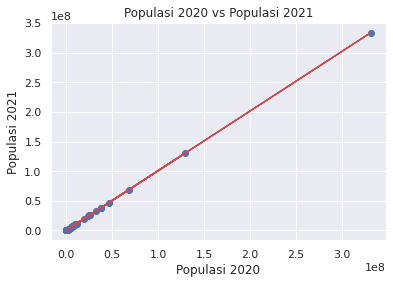

In [71]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Populasi 2020')
plt.ylabel('Populasi 2021')
plt.title('Populasi 2020 vs Populasi 2021')

Setelah yakin dengan model yang dibuat, selanjutnya adalah prediksi jumlah populasi 2021 dengan populasi 2020 sebanyak 150000 jiwa

In [73]:
lin_reg.predict([[50000]])

array([[210312.0317799]])

jumlah populasi pada tahun 2021 berdasarkan populasi tahun 2020 sebanyak 50.000 jiwa adalah 210.312 jiwa